In [2]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)


In [3]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [5]:
for elem in dataset:
    print(elem)


tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [6]:
it = iter(dataset)
print(next(it).numpy())


8


In [8]:
print(dataset.reduce(0, lambda state, value: state + value).numpy())


27


In [10]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
dataset1.element_spec


TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [20]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]), tf.random.uniform([4, 100], maxval=100, dtype=tf.int32))
)
dataset2.element_spec


(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [21]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3.element_spec


(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [28]:
dataset4 = tf.data.Dataset.from_tensors(
    tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4])
)
dataset4.element_spec


SparseTensorSpec(TensorShape([3, 4]), tf.int32)

In [34]:
dataset4.element_spec.value_type


tensorflow.python.framework.sparse_tensor.SparseTensor

In [35]:
dataset1 = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4, 10], maxval=10, dtype=tf.int32)
)
dataset1


<_TensorSliceDataset element_spec=TensorSpec(shape=(10,), dtype=tf.int32, name=None)>

In [36]:
for z in dataset1:
    print(z.numpy())


[1 6 7 8 6 6 9 9 6 3]
[0 5 1 9 9 1 2 2 6 2]
[5 4 9 0 4 7 9 4 7 2]
[8 4 5 2 7 2 2 7 1 0]


In [39]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]), (tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))
)
dataset2


<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None))>

In [40]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3


<_ZipDataset element_spec=(TensorSpec(shape=(10,), dtype=tf.int32, name=None), (TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None)))>

In [41]:
for a, (b, c) in dataset3:
    print(f"shapes: {a.shape}, {b.shape}, {c.shape}")


shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)


In [43]:
train, test = tf.keras.datasets.fashion_mnist.load_data()


In [44]:
images, labels = train
images = images / 255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset


<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [46]:
def count(stop):
    i = 0
    while i <= stop:
        yield i
        i += 1


for n in count(5):
    print(n)


0
1
2
3
4
5


In [47]:
ds_counter = tf.data.Dataset.from_generator(
    count, args=[25], output_types=tf.int32, output_shapes=()
)


In [48]:
for count_batch in ds_counter.repeat().batch(10).take(10):
    print(count_batch.numpy())


[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25  0  1  2  3]
[ 4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23]
[24 25  0  1  2  3  4  5  6  7]
[ 8  9 10 11 12 13 14 15 16 17]
[18 19 20 21 22 23 24 25  0  1]
[ 2  3  4  5  6  7  8  9 10 11]
[12 13 14 15 16 17 18 19 20 21]


In [49]:
def gen_series():
    i = 0
    while True:
        size = np.random.randint(1, 10)
        yield i, np.random.normal(size=(size,))
        i += 1


for i, series in gen_series():
    print(i, ":", str(series))
    if i > 5:
        break


0 : [ 1.2466 -0.2383  0.1588]
1 : [-0.9232  0.7214  0.8169  0.9513  0.6094 -1.7967]
2 : [ 0.5554  0.109  -0.7535 -0.2516 -0.9317  1.1341  0.8874]
3 : [ 0.8993  0.6061  1.0045 -0.7394  0.1023]
4 : [ 0.0986  0.1776 -1.7669  1.5343 -0.4701 -1.1364 -1.7097]
5 : [ 0.8793 -0.8194  2.6058 -0.6944 -0.0903  0.1726 -1.3644  0.6902  0.2527]
6 : [-1.4029 -0.9352 -1.4145 -1.2768]


In [53]:
ds_series = tf.data.Dataset.from_generator(
    gen_series, output_types=(tf.int32, tf.float32), output_shapes=((), (None,))
)
ds_series


<_FlatMapDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [63]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10)

ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())


[ 1  2  3 17 23  9 19 13  8 12]

[[ 0.2237  0.2564 -0.349   0.5167  0.      0.      0.      0.      0.    ]
 [ 0.1878 -0.4723 -0.6585 -1.1078  2.4764  0.      0.      0.      0.    ]
 [ 1.1638 -0.8839 -0.9904 -0.2428 -0.2466 -0.3862  0.3155  0.      0.    ]
 [-2.425   1.4262 -0.0616 -1.7093 -1.3237  1.0323 -0.9064  0.7169  0.    ]
 [-0.4601  0.7047  0.1245 -0.9898  0.1275  0.      0.      0.      0.    ]
 [ 0.6558  0.3125  0.5048  0.4419 -0.1734  0.      0.      0.      0.    ]
 [ 1.1398  0.604  -0.8705 -0.5785 -2.5117 -0.5096  0.2887 -0.0271  0.0254]
 [-0.1732  0.1992  0.0779  1.1117  1.147  -1.6863 -1.6469  0.      0.    ]
 [ 0.329   0.8411  0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.1453 -0.9069  1.4947  0.0366  0.5062 -0.3495 -0.354   0.      0.    ]]


In [64]:
flowers = tf.keras.utils.get_file(
    "flower_photos",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    untar=True,
)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


In [65]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255, rotation_range=20
)

images, labels = next(img_gen.flow_from_directory(flowers))


Found 3670 images belonging to 5 classes.


In [66]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)


float32 (32, 256, 256, 3)
float32 (32, 5)


In [68]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers),
    output_types=(tf.float32, tf.float32),
    output_shapes=([32, 256, 256, 3], [32, 5]),
)
ds.element_spec


(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [69]:
for images, labels in ds.take(1):
    print("images.shape: ", images.shape)
    print("labels.shape", labels.shape)


Found 3670 images belonging to 5 classes.
images.shape:  (32, 256, 256, 3)
labels.shape (32, 5)


In [70]:
# Creates a dataset that reads all of the examples from two files.
fsns_test_file = tf.keras.utils.get_file(
    "fsns.tfrec",
    "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001",
)


7904079/7904079 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [71]:
dataset = tf.data.TFRecordDataset(filenames=[fsns_test_file])
dataset


<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [72]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())
parsed.features.feature["image/text"]


bytes_list {
  value: "Rue Perreyon"
}

In [74]:
directory_url = "https://storage.googleapis.com/download.tensorflow.org/data/illiad/"
file_names = ["cowper.txt", "derby.txt", "butler.txt"]

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]


815980/815980 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
809730/809730 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
807992/807992 ━━━━━━━━━━━━━━━━━━━━ 1s 2us/step


In [75]:
dataset = tf.data.TextLineDataset(file_paths)
for line in dataset.take(5):
    print(line.numpy())


b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [3]:
titanic_file = tf.keras.utils.get_file(
    "train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
)


In [77]:
df = pd.read_csv(titanic_file)
df.head()


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [80]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(1):
    for key, value in feature_batch.items():
        print("{!r:20s} : {}".format(key, value))


'survived'           : 0
'sex'                : b'male'
'age'                : 22.0
'n_siblings_spouses' : 1
'parch'              : 0
'fare'               : 7.25
'class'              : b'Third'
'deck'               : b'unknown'
'embark_town'        : b'Southampton'
'alone'              : b'n'


In [81]:
titanic_slices.element_spec


{'survived': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'sex': TensorSpec(shape=(), dtype=tf.string, name=None),
 'age': TensorSpec(shape=(), dtype=tf.float64, name=None),
 'n_siblings_spouses': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'parch': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'fare': TensorSpec(shape=(), dtype=tf.float64, name=None),
 'class': TensorSpec(shape=(), dtype=tf.string, name=None),
 'deck': TensorSpec(shape=(), dtype=tf.string, name=None),
 'embark_town': TensorSpec(shape=(), dtype=tf.string, name=None),
 'alone': TensorSpec(shape=(), dtype=tf.string, name=None)}

In [4]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4, label_name="survived"
)


In [12]:
for feature_batch, label_batch in titanic_batches.take(1):
    for feature, value in feature_batch.items():
        print("{!r:20s} : {}".format(feature, value))


'sex'                : [b'male' b'male' b'male' b'male']
'age'                : [32.5 39.   4.  11. ]
'n_siblings_spouses' : [1 0 4 1]
'parch'              : [0 0 2 2]
'fare'               : [ 30.0708  26.      31.275  120.    ]
'class'              : [b'Second' b'Second' b'Third' b'First']
'deck'               : [b'unknown' b'unknown' b'unknown' b'B']
'embark_town'        : [b'Cherbourg' b'Southampton' b'Southampton' b'Southampton']
'alone'              : [b'n' b'y' b'n' b'n']


In [13]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file,
    batch_size=4,
    label_name="survived",
    select_columns=["class", "fare", "survived"],
)

for feature_batch, label_batch in titanic_batches.take(1):
    for feature, value in feature_batch.items():
        print("{!r:20s} : {}".format(feature, value))


'fare'               : [ 7.7333  7.75   24.15   10.5   ]
'class'              : [b'Third' b'Third' b'Third' b'Second']


In [18]:
titanic_types = [
    tf.int32,
    tf.string,
    tf.float32,
    tf.int32,
    tf.int32,
    tf.float32,
    tf.string,
    tf.string,
    tf.string,
    tf.string,
]
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types, header=True)

for line in dataset.take(2):
    print([item.numpy() for item in line])


[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']


In [19]:
%%writefile missing.csv
1,2,3,4
,2,3,4
1,,3,4
1,2,,4
1,2,3,
,,,

Writing missing.csv


In [26]:
record_defaults = [999, 999, 999, 999]
dataset = tf.data.experimental.CsvDataset(
    "missing.csv", record_defaults=record_defaults
)
dataset = dataset.map(lambda *items: tf.stack(items))
dataset


<_MapDataset element_spec=TensorSpec(shape=(4,), dtype=tf.int32, name=None)>

In [27]:
for line in dataset:
    print(line.numpy())


[1 2 3 4]
[999   2   3   4]
[  1 999   3   4]
[  1   2 999   4]
[  1   2   3 999]
[999 999 999 999]


In [28]:
record_defaults = [999, 999]
dataset = tf.data.experimental.CsvDataset(
    "missing.csv", record_defaults=record_defaults, select_cols=[1, 3]
)
dataset = dataset.map(lambda *items: tf.stack(items))

for line in dataset:
    print(line.numpy())


[2 4]
[2 4]
[999   4]
[2 4]
[  2 999]
[999 999]


In [29]:
flowers_root = tf.keras.utils.get_file(
    "flower_photos",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    untar=True,
)
flowers_root = pathlib.Path(flowers_root)


In [32]:
for item in flowers_root.glob("*"):
    print(item)


C:\Users\HP\.keras\datasets\flower_photos\daisy
C:\Users\HP\.keras\datasets\flower_photos\dandelion
C:\Users\HP\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\HP\.keras\datasets\flower_photos\roses
C:\Users\HP\.keras\datasets\flower_photos\sunflowers
C:\Users\HP\.keras\datasets\flower_photos\tulips


In [34]:
list_ds = tf.data.Dataset.list_files(str(flowers_root / "*/*"))
for f in list_ds.take(5):
    print(f.numpy())


b'C:\\Users\\HP\\.keras\\datasets\\flower_photos\\dandelion\\3469112805_6cc8640236.jpg'
b'C:\\Users\\HP\\.keras\\datasets\\flower_photos\\sunflowers\\9431896325_23bf6e8761.jpg'
b'C:\\Users\\HP\\.keras\\datasets\\flower_photos\\sunflowers\\19710925313_31682fa22b_m.jpg'
b'C:\\Users\\HP\\.keras\\datasets\\flower_photos\\daisy\\8489463746_a9839bf7e4.jpg'
b'C:\\Users\\HP\\.keras\\datasets\\flower_photos\\tulips\\112650879_82adc2cc04_n.jpg'


In [35]:
def process_path(file_path):
    label = tf.strings.split(file_path, os.sep)[-2]
    return tf.io.read_file(file_path), label


labeled_ds = list_ds.map(process_path)


In [36]:
for image_raw, label_text in labeled_ds.take(1):
    print(repr(image_raw.numpy()[:100]))
    print()
    print(label_text.numpy())


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05'

b'daisy'


In [45]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(2)

for batch in batched_dataset.take(6):
    print([arr.numpy() for arr in batch])


[array([0, 1], dtype=int64), array([ 0, -1], dtype=int64)]
[array([2, 3], dtype=int64), array([-2, -3], dtype=int64)]
[array([4, 5], dtype=int64), array([-4, -5], dtype=int64)]
[array([6, 7], dtype=int64), array([-6, -7], dtype=int64)]
[array([8, 9], dtype=int64), array([-8, -9], dtype=int64)]
[array([10, 11], dtype=int64), array([-10, -11], dtype=int64)]


In [51]:
batched_dataset = dataset.batch(7, drop_remainder=True)
batched_dataset


<_BatchDataset element_spec=(TensorSpec(shape=(7,), dtype=tf.int64, name=None), TensorSpec(shape=(7,), dtype=tf.int64, name=None))>

In [54]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None,))

for batch in dataset.take(2):
    print(batch.numpy())
    print()


[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [55]:
titanic_lines = tf.data.TextLineDataset(titanic_file)


In [56]:
def plot_batch_sizes(ds):
    batch_sizes = [batch.shape[0] for batch in ds]
    plt.bar(range(len(batch_sizes)), batch_sizes)
    plt.xlabel("Batch Number")
    plt.ylabel("Batch Size")


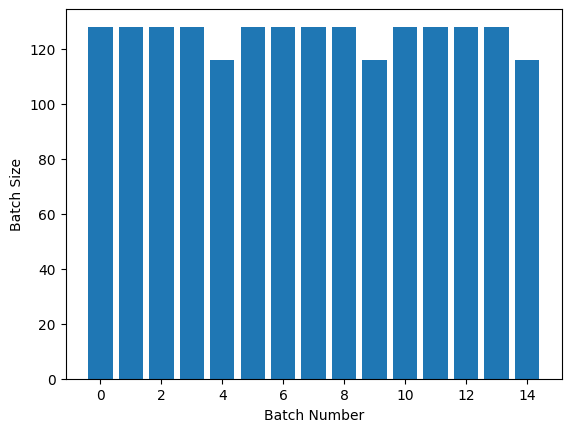

In [69]:
titanic_batches = titanic_lines.batch(128).repeat(3)
plot_batch_sizes(titanic_batches)


In [72]:
epochs = 3
dataset = titanic_lines.batch(128)

for epoch in range(epochs):
    for batch in dataset:
        print(batch.shape)
    print("end of epoch", epoch)


(128,)
(128,)
(128,)
(128,)
(116,)
end of epoch 0
(128,)
(128,)
(128,)
(128,)
(116,)
end of epoch 1
(128,)
(128,)
(128,)
(128,)
(116,)
end of epoch 2


In [77]:
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter, lines))
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(20)
dataset


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [84]:
n, line_batch = next(iter(dataset))
print(n.numpy())


[ 22  28  11  87  60  10  52  36  80  86  90 106   7  31  81  72  70 112
  83  23]


In [86]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.shuffle(buffer_size=100).batch(10).repeat(2)

for n, line_batch in shuffled.skip(60).take(5):
    print(n.numpy())


[554 549 463 585 571 424 613 581 619 538]
[573 477 427 476 510 289 409 474 627 466]
[601 531 624 572 540 590 605 597]
[65 42 24 63 41 19 43  2 58 87]
[ 83  29 104  91 112  85 101  37  39 108]


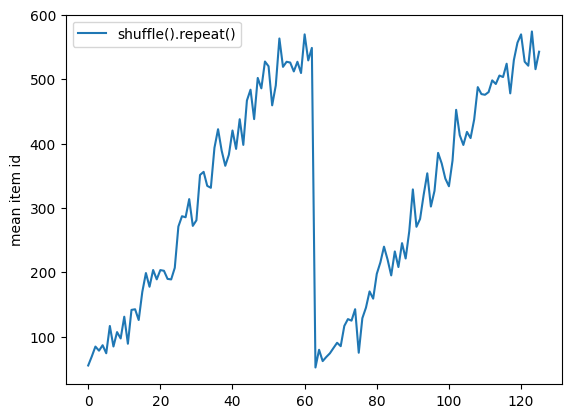

In [91]:
shuffl_repeat = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffl_repeat, label="shuffle().repeat()")
plt.ylabel("mean item id")
plt.legend()


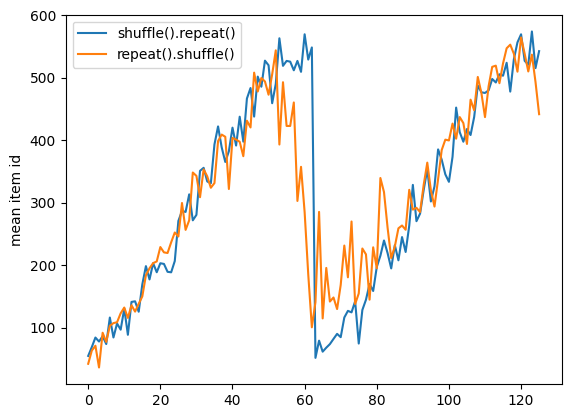

In [94]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.repeat(2).shuffle(buffer_size=100).batch(10)

repeat_shuffle = [n.numpy().mean() for n, _ in shuffled]
plt.plot(shuffl_repeat, label="shuffle().repeat()")
plt.plot(repeat_shuffle, label="repeat().shuffle()")
plt.ylabel("mean item id")
plt.legend()


In [95]:
list_ds = tf.data.Dataset.list_files(str(flowers_root / "*/*"))


In [97]:
def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)
    label = parts[-2]

    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label


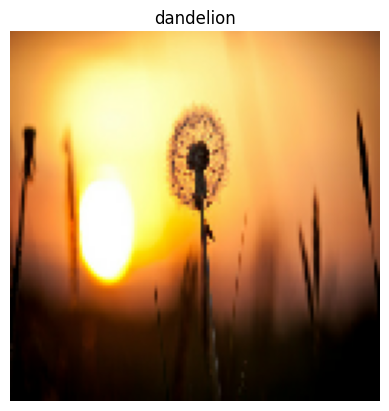

In [104]:
file_path = next(iter(list_ds))

image, label = parse_image(file_path)


def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label.numpy().decode("utf-8"))
    plt.axis("off")


show(image, label)


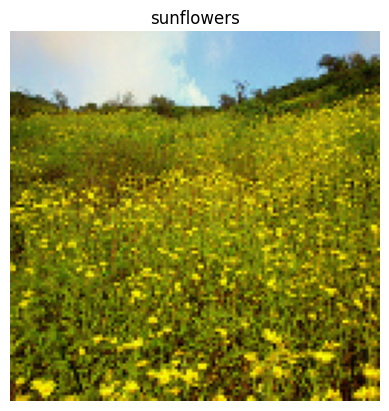

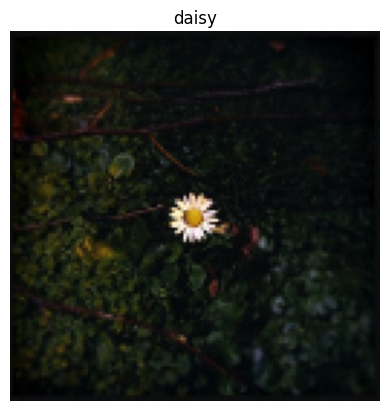

In [106]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
    show(image, label)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1318336..1.0891469].


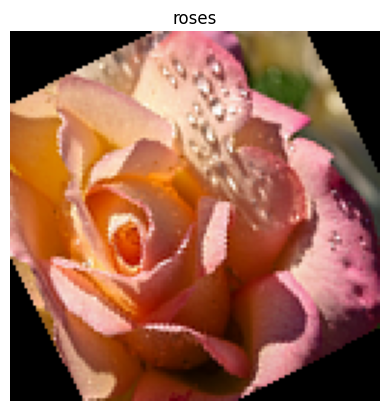

In [109]:
import scipy.ndimage as ndimage


@tf.py_function(Tout=tf.float32)
def random_rotate_image(image):
    image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
    return image


image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.065524094..1.0716017].


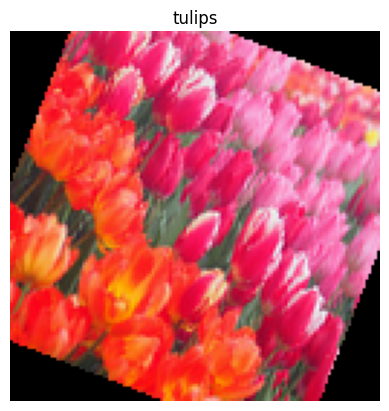

In [116]:
def tf_random_rotate_image(image, label):
    im_shape = image.shape
    image = random_rotate_image(image)
    image.set_shape(im_shape)
    return image, label


rot_ds = images_ds.map(tf_random_rotate_image)
for image, label in rot_ds.take(1):
    show(image, label)


In [118]:
fsns_test_file = tf.keras.utils.get_file(
    "fsns.tfrec",
    "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001",
)
dataset = tf.data.TFRecordDataset(filenames=[fsns_test_file])
dataset


<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

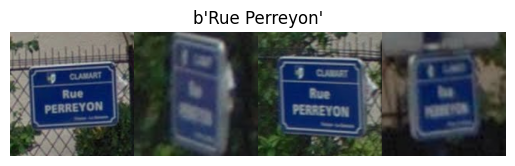

In [119]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

feature = parsed.features.feature
raw_img = feature["image/encoded"].bytes_list.value[0]
img = tf.image.decode_png(raw_img)
plt.imshow(img)
plt.axis("off")
_ = plt.title(feature["image/text"].bytes_list.value[0])


In [126]:
raw_example = next(iter(dataset))


def tf_parse(eg):
    example = tf.io.parse_example(
        eg[tf.newaxis],
        {
            "image/encoded": tf.io.FixedLenFeature(shape=(), dtype=tf.string),
            "image/text": tf.io.FixedLenFeature(shape=(), dtype=tf.string),
        },
    )
    return example["image/encoded"], example["image/text"][0]


img, text = tf_parse(raw_example)
print(text.numpy())
print(repr(img.numpy())[:20], "...")


b'Rue Perreyon'
array([b'\x89PNG\r\n ...


In [127]:
decoded = dataset.map(tf_parse)
decoded


<_MapDataset element_spec=(TensorSpec(shape=(1,), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [128]:
image_batch, text_batch = next(iter(decoded.batch(10)))
image_batch.shape


TensorShape([10, 1])

In [132]:
range_ds = tf.data.Dataset.range(100000)

batches = range_ds.batch(10, drop_remainder=True)
for batch in batches.take(5):
    print(batch.numpy())


[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


In [133]:
def dense_1_step(batch):
    return batch[:-1], batch[1:]


predict_dense_1_step = batches.map(dense_1_step)

batches = predict_dense_1_step.batch(10)

for features, label in predict_dense_1_step.take(3):
    print(features.numpy(), ":", label.numpy())


[0 1 2 3 4 5 6 7 8] : [1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18] : [11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28] : [21 22 23 24 25 26 27 28 29]


In [134]:
zip_path = tf.keras.utils.get_file(
    origin="https://storage.googleapis.com/download.tensorflow.org/data/creditcard.zip",
    fname="creditcard.zip",
    extract=True,
)

csv_path = zip_path.replace(".zip", ".csv")


69155632/69155632 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [136]:
creditcard_ds = tf.data.experimental.make_csv_dataset(
    csv_path,
    batch_size=1024,
    label_name="Class",
    column_defaults=[float()] * 30 + [int()],
)


In [139]:
def count(counts, batch):
    features, labels = batch
    class_1 = labels == 1
    class_1 = tf.cast(class_1, tf.int32)

    class_0 = labels == 0
    class_0 = tf.cast(class_0, tf.int32)

    counts["class_0"] += tf.reduce_sum(class_0)
    counts["class_1"] += tf.reduce_sum(class_1)
    return counts


counts = creditcard_ds.take(10).reduce(
    initial_state={"class_0": 0, "class_1": 0}, reduce_func=count
)

counts = np.array([counts["class_0"].numpy(), counts["class_1"].numpy()]).astype(
    np.float32
)

fractions = counts / counts.sum()
print(fractions)


[0.996 0.004]


In [142]:
negative_ds = (
    creditcard_ds.unbatch().filter(lambda features, label: label == 0).repeat()
)
positive_ds = (
    creditcard_ds.unbatch().filter(lambda features, label: label == 1).repeat()
)

for f, l in positive_ds.batch(10).take(1):
    print(l)
for f, l in negative_ds.batch(10).take(1):
    print(l)


tf.Tensor([1 1 1 1 1 1 1 1 1 1], shape=(10,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int32)


In [145]:
balanced_ds = tf.data.Dataset.sample_from_datasets(
    [negative_ds, positive_ds],
    [0.5, 0.5],
).batch(10)

for f, l in balanced_ds.take(10):
    print(l)


tf.Tensor([0 1 1 1 1 1 1 1 1 0], shape=(10,), dtype=int32)
tf.Tensor([0 0 1 0 1 1 0 0 0 0], shape=(10,), dtype=int32)
tf.Tensor([1 0 0 0 1 1 1 1 0 1], shape=(10,), dtype=int32)
tf.Tensor([1 1 1 0 0 0 0 1 1 0], shape=(10,), dtype=int32)
tf.Tensor([0 1 1 0 0 0 1 1 0 0], shape=(10,), dtype=int32)
tf.Tensor([0 0 1 1 0 0 1 1 0 0], shape=(10,), dtype=int32)
tf.Tensor([0 0 0 1 1 1 1 1 0 0], shape=(10,), dtype=int32)
tf.Tensor([0 0 1 0 0 0 1 0 1 0], shape=(10,), dtype=int32)
tf.Tensor([1 0 0 0 1 0 1 0 1 1], shape=(10,), dtype=int32)
tf.Tensor([1 1 0 0 0 0 0 0 1 1], shape=(10,), dtype=int32)


In [147]:
def class_func(features, label):
    return label


resample_ds = creditcard_ds.unbatch().rejection_resample(
    class_func, target_dist=[0.5, 0.5], initial_dist=fractions
).batch(10)


Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



In [154]:
balanced_ds = resample_ds.map(lambda extra_label, features_and_label: features_and_label)

In [153]:
for f, l in balanced_ds.take(10):
    print(l)

tf.Tensor([0 0 1 1 0 0 1 1 1 1], shape=(10,), dtype=int32)
tf.Tensor([0 1 1 1 1 1 0 1 0 1], shape=(10,), dtype=int32)
tf.Tensor([0 1 1 0 0 1 0 1 0 1], shape=(10,), dtype=int32)
tf.Tensor([0 0 0 1 1 0 1 0 0 1], shape=(10,), dtype=int32)
tf.Tensor([0 1 0 0 1 0 0 0 1 0], shape=(10,), dtype=int32)
tf.Tensor([1 1 1 0 1 0 0 0 0 1], shape=(10,), dtype=int32)
tf.Tensor([0 0 0 0 1 0 0 1 0 1], shape=(10,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 0 0 0], shape=(10,), dtype=int32)
tf.Tensor([0 1 1 1 0 0 0 0 1 0], shape=(10,), dtype=int32)
tf.Tensor([0 1 0 1 0 0 1 0 1 1], shape=(10,), dtype=int32)


In [156]:
range_ds = tf.data.Dataset.range(20)

iterator = iter(range_ds)
ckpt = tf.train.Checkpoint(step=tf.Variable(0), iterator=iterator)
manager = tf.train.CheckpointManager(ckpt, "/tmp/my_ckpt", max_to_keep=3)

print([next(iterator).numpy() for _ in range(5)])
save_path = manager.save()

print([next(iterator).numpy() for _ in range(5)])
ckpt.restore(manager.latest_checkpoint)

print([next(iterator).numpy() for _ in range(5)])

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]
